In [192]:
import pandas as pd
import datetime as dt
from datetime import date
import numpy as np
from scipy import stats
import seaborn as sns
import missingno as msno
import plotly.graph_objects as go
import matplotlib.pyplot as plt
import statistics

In [193]:
baselist = []
threemonth = []
twentyfour = []
dupcount = []

data = pd.read_csv('cleaned-data.csv')

for index, row in data.iterrows():
    if data.at[index, 'MONTH'] == 0:
        baselist.append(row)
    if data.at[index, 'MONTH'] == 3:
        threemonth.append(row)
    if data.at[index, 'MONTH'] == 24:
        twentyfour.append(row)
baseline = pd.DataFrame(data = baselist)
three = pd.DataFrame(data = threemonth)
twentyfour1 = pd.DataFrame(data = twentyfour)

baseline = baseline.reset_index()
three = three.reset_index()
twentyfour1 = twentyfour1.reset_index()

# Table 1

In [194]:
data = pd.read_csv('cleaned-data.csv')

#height
height = "{} in +- {}"
roundedheight = round(data['HEIGHT_IN'].mean(),2)
roundedstd = round(data['HEIGHT_IN'].std(),1)
height1 = height.format(roundedheight,roundedstd)


#weight
weight = " {} lbs +- {}"
roundedweight = round(data['WEIGHT_LB'].mean(),2)
roundedstdw = round(data['WEIGHT_LB'].std(),1)
weight1 = weight.format(roundedweight,roundedstdw)


#gender
female = "Female:{} ({})"
male = "Male: {} ({})"
gen = "Male: {} ({}) Female: {} ({})"
femalecount = 0
malecount = 0
for index, row in data.iterrows(): 
    if data.at[index, 'MONTH'] == 0:
        if data.at[index,'gender']== 2:
            #print('female')
            femalecount += 1
        elif data.at[index, 'gender']==1:
            #print('male')
            malecount += 1
totalsex = femalecount + malecount
femaleperc = round((femalecount / totalsex)*100,1)
maleperc = round((malecount / totalsex)*100,1)
gender = gen.format(malecount, maleperc, femalecount, femaleperc)


#race
Race = "  Black: {} ({})  White: {} ({})" 
Race2 = "Race: \n Black:   \n White: "

Black = "Black:{} ({})"
White = "White:{} ({})"
blackcount = 0
whitecount =0
for index, row in data.iterrows():
    if data.at[index, 'MONTH'] ==0:
        if data.at[index, 'RACE']==3:
            blackcount += 1
        elif data.at[index,'RACE']==5:
            whitecount += 1
totalrace = blackcount + whitecount 
blackperc = round((blackcount / totalrace)*100,1)
whiteperc = round((whitecount/totalrace)*100,1)
black1 = Black.format(blackcount, blackperc)
white1 = White.format(whitecount,whiteperc)
race1 = Race.format(blackcount, blackperc, whitecount, whiteperc)



#age
Age = " {} +- {}"
age = 0
now = pd.Timestamp('now')
data['DOB'] = pd.to_datetime(data['DOB']) 
data['DOB'] = data['DOB'].where(data['DOB'] < now, data['DOB'] -  np.timedelta64(100, 'Y'))   # 2
data['age'] = (now - data['DOB']).astype('<m8[Y]')    # 3
roundedavgage = round(data['age'].mean(),1)
roundedstdage = round(data['age'].std(),1)
age1 = Age.format(roundedavgage, roundedstdage)



#hypertension at baseline?
hpt = "{} ({})"
hptcount = 0
for index, row in data.iterrows(): 
    if data.at[index, 'MONTH']==0:
        if data.at[index,'HTNNEW']== 1:
        #print('female')
            hptcount += 1
totalpt = 71
htpperc = round((hptcount / totalpt)*100,1)
hptval = hpt.format(hptcount, htpperc)

#type of cancer treatment
chemo= "Anthracycline:{} ({})  Trastuzumab: {} ({})  Taxane: {} ({}) Cyclophosphamide: {} ({}) Other: {} ({})"
anthcount = 0
trast = 0
tax = 0
cyc = 0
other = 0
for index, row in data.iterrows():
    if data.at[index, 'MONTH']== 0:
        if data.at[index, 'ANTHRACYCLINE']==1:
            anthcount += 1
        if data.at[index, 'TRASTUZUMAB']==1:
            trast += 1
        if data.at[index, 'TAXANE']==1:
            tax += 1
        if data.at[index, 'CYCLO']==1:
            cyc += 1
        if data.at[index, 'OTHERCHEMO']==1:
            other += 1
totalpt = 71
anthp = round((anthcount / totalpt)*100,1)
trastp = round((trast / totalpt)*100,1)
taxp = round((tax / totalpt)*100,1)
cycp = round((cyc / totalpt)*100,1)
otherp = round((other / totalpt)*100,1)
chemoval = chemo.format(anthcount, anthp, trast, trastp, tax, taxp, cyc, cycp, other, otherp)

#bmi
bmi30 = 0
notbmi = 0
bmival = "{} ({})"
for index, row in data.iterrows():
    if data.at[index, 'MONTH'] == 0:
        if data.at[index, 'BMI']>= 30:
            bmi30 += 1
totalpt = 71
bmiperc = round((bmi30 / totalpt)*100 , 1)
bmi = bmival.format(bmi30, bmiperc)


#cardioprotective meds
aceinhibcount = 0
diurcount = 0
betacount = 0
angcount = 0
totalpt = 71
CARDMED = "Ace Inhibitors: {}% Diuretics: {}% BetaBlockers: {}% Angiotensin Blockers: {}%"

for index, row in data.iterrows():
    if pd.isnull(data.at[index, 'ACE_INHIB_YR'])== False:
        aceinhibcount += 1
    if pd.isnull(data.at[index, 'DIURETICS_YR'])== False:
        diurcount += 1
    if pd.isnull(data.at[index, 'BETABLOCK_YR'])== False:
        betacount += 1
    if pd.isnull(data.at[index, 'ANGIOTENS_YR']) == False:
        angcount += 1
aceinhibperc = round((aceinhibcount / totalpt)*100,1)
diurperc = round((diurcount/ totalpt)*100,1)
betaperc = round((betacount / totalpt)*100,1)
angperc = round((angcount / totalpt)*100,1)
CARDIO = CARDMED.format(aceinhibperc, diurperc, betaperc, angperc)

In [195]:
npr = np.array([['Age', age1],['Height', height1],['Weight', weight1], ['Race' , race1],['Gender', gender], ['Hypertension',hptval], ['Treatment Regimen', chemoval],['BMI ', bmi], ['Cardioprotective Medications', CARDIO]])
table1 = pd.DataFrame(data = npr, columns = ["Characteristics", "Result"] )

table1

,Characteristics,Result
0,Age,59.8 +- 14.3
1,Height,66.21 in +- 3.9
2,Weight,185.18 lbs +- 44.0
3,Race,Black: 17 (20.0) White: 68 (80.0)
4,Gender,Male: 30 (35.3) Female: 55 (64.7)
5,Hypertension,46 (64.8)
6,Treatment Regimen,Anthracycline:8 (11.3) Trastuzumab: 0 (0.0) ...
7,BMI,36 (50.7)
8,Cardioprotective Medications,Ace Inhibitors: 23.9% Diuretics: 32.4% BetaBlo...


# Table 2

In [196]:
#Average heart rate at baseline, threemonth, and 24month, and std
def average(col, time):
    return round(time[col].mean(), 2)

def std_dev(col, time):
    return round(time[col].std(), 2)    

def heart_data(col):
    std_format = '{} +- {}'
    
    bmean = average(col, baseline)
    bstd = std_dev(col, baseline)
    meanstdbaseline = std_format.format(bmean, bstd)

    thmean = average(col, three)
    thstd = std_dev(col, three)
    meanstdthr = std_format.format(thmean, thstd)

    twmean = average(col, twentyfour1)
    twstd = std_dev(col, twentyfour1)
    meanstdtw = std_format.format(twmean, twstd)

    hr_3month, hr_3monthp = stats.ttest_rel(baseline['hr_mesa'], three['hr_mesa']) 
    hr_24month, hr_24monthp = stats.ttest_rel(baseline['hr_mesa'], twentyfour1['hr_mesa'])
    
    return [meanstdbaseline,meanstdthr, meanstdtw, hr_3monthp, hr_24monthp]

In [197]:
#heart rate
bmean = round(baseline['hr_mesa'].mean(), 2)
thmean = round(three['hr_mesa'].mean(), 2)
twmean = round(twentyfour1['hr_mesa'].mean(), 2)

#systolic blood pressure 
sbpmean = round(baseline['sys_bp_mesa'].mean(), 2)
sbpmeanth = round(three['sys_bp_mesa'].mean(), 2)
sbpmeantw = round(twentyfour1['sys_bp_mesa'].mean(), 2)

#diastolic blood pressure
dbpmean = round(baseline['dia_bp_mesa'].mean(), 2)
dbpmeanth = round(three['dia_bp_mesa'].mean(), 2)
dbpmeantw = round(twentyfour1['dia_bp_mesa'].mean(), 2)

#LVEDV
edvmean = round(baseline['vol5_lvedv'].mean(), 2)
edvmeanth = round(three['vol5_lvedv'].mean(), 2)
edvmeantw = round(twentyfour1['vol5_lvedv'].mean(), 2)

#LVESV
esvmean = round(baseline['vol5_lvesv'].mean(), 2)
esvmeanth = round(three['vol5_lvesv'].mean(), 2)
esvmeantw = round(twentyfour1['vol5_lvesv'].mean(), 2)

#SV
svmean = round(baseline['VOL5_SV'].mean(), 2)
svmeanth = round(three['VOL5_SV'].mean(), 2)
svmeantw = round(twentyfour1['VOL5_SV'].mean(), 2)

#EF
efmean = round(baseline['vol5_lvef'].mean(), 2)
efmeanth = round(three['vol5_lvef'].mean(), 2)
efmeantw = round(twentyfour1['vol5_lvef'].mean(), 2)

#LVMASS
msmean = round(baseline['vol5_lvmass'].mean(), 2)
msmeanth = round(three['vol5_lvmass'].mean(), 2)
msmeantw = round(twentyfour1['vol5_lvmass'].mean(), 2)

In [198]:
table2 = np.array([heart_data('hr_mesa'), heart_data('sys_bp_mesa'), heart_data('dia_bp_mesa'), 
                   heart_data('vol5_lvedv'), heart_data('vol5_lvesv'), heart_data('VOL5_SV'),
                  heart_data('vol5_lvef'), heart_data('vol5_lvmass')])

table2 = pd.DataFrame(data = table2, index = ["Heart Rate", "Systolic BP", "Diastolic BP", "LVEDV", "LVESV", "Stroke Volume", 
                                                "Ejection Fraction", "LV Mass"], columns = ["Baseline", "3 Months", "24 Months", "3-Month Change", "24-Month Change"])       


meantable = np.array([[bmean, sbpmean, dbpmean, edvmean, esvmean, svmean, efmean, msmean],[thmean, sbpmeanth, dbpmeanth, edvmeanth, esvmeanth, svmeanth, efmeanth, msmeanth], 
                    [twmean, sbpmeantw, dbpmeantw, edvmeantw, esvmeantw, svmeantw, efmeantw, msmeantw]])
meandf = pd.DataFrame(data = meantable, index = ["Baseline", "3 Months", "24 Months"], columns = ["Heart Rate", "Systolic BP", "Diastolic BP", "LVEDV", "LVESV", "Stroke Volume", 
                                                "Ejection Fraction", "LV Mass"]) 
table2

,Baseline,3 Months,24 Months,3-Month Change,24-Month Change
Heart Rate,73.27 +- 15.07,81.0 +- 11.91,70.69 +- 10.48,nan,nan
Systolic BP,116.77 +- 16.1,108.65 +- 13.59,115.06 +- 18.04,nan,nan
Diastolic BP,69.09 +- 11.76,64.92 +- 10.74,68.39 +- 11.57,nan,nan
LVEDV,125.51 +- 34.57,121.58 +- 35.96,123.35 +- 40.57,nan,nan
LVESV,48.9 +- 21.11,50.41 +- 20.18,52.5 +- 24.27,nan,nan
Stroke Volume,76.61 +- 18.23,71.17 +- 19.43,70.84 +- 22.82,nan,nan
Ejection Fraction,62.0 +- 7.82,59.23 +- 7.0,58.3 +- 8.86,nan,nan
LV Mass,105.85 +- 26.9,105.12 +- 24.5,102.88 +- 28.06,nan,nan


# Figure 2

In [199]:
# twentyfour1[twentyfour1['vol5_lvef'] < 50]
# twentyfour1[(baseline['vol5_lvef'] - twentyfour1['vol5_lvef']) > 5]
light_purple24 = pd.concat([twentyfour1[twentyfour1['vol5_lvef'] < 50]
, twentyfour1[(baseline['vol5_lvef'] - twentyfour1['vol5_lvef']) > 5]
]).drop_duplicates().reset_index(drop=True)
ids = new_df['ID']

In [200]:
light_purple0 = baseline[baseline['ID'].isin(ids)].reset_index()
light_purple3 = three[three['ID'].isin(ids)].reset_index()

In [201]:
light_purple00 = light_purple0[(light_purple3['vol5_lvesv'] - light_purple0['vol5_lvesv']) < 3]
light_purple33 = light_purple3[(light_purple3['vol5_lvesv'] - light_purple0['vol5_lvesv']) < 3]
light_purple2424 = light_purple24[(light_purple3['vol5_lvesv'] - light_purple0['vol5_lvesv']) < 3]

In [202]:
LVEDV_light_purple = (light_purple00['vol5_lvedv'] - light_purple33['vol5_lvedv']).mean()
LVEDV_light_purple

12.878000000000002

In [203]:
LVESV_light_purple = (light_purple00['vol5_lvesv'] - light_purple33['vol5_lvesv']).mean()
LVESV_light_purple

2.3580000000000014

In [204]:
ids2 = []
for num in twentyfour1['ID']:
    if num not in ids:
        ids2.append(num)
light_purple000 = baseline[baseline['ID'].isin(ids2)].reset_index()
light_purple333 = three[three['ID'].isin(ids2)].reset_index()
light_purple242424 = twentyfour1[twentyfour1['ID'].isin(ids2)].reset_index()

In [205]:
light_purple0000 = light_purple000[(light_purple333['vol5_lvesv'] - light_purple000['vol5_lvesv']) < 3]
light_purple3333 = light_purple333[(light_purple333['vol5_lvesv'] - light_purple000['vol5_lvesv']) < 3]
light_purple24242424 = light_purple242424[(light_purple333['vol5_lvesv'] - light_purple000['vol5_lvesv']) < 3]

In [206]:
LVEDV_dark_purple = (light_purple0000['vol5_lvedv'] - light_purple3333['vol5_lvedv']).mean()
LVEDV_dark_purple

15.709666666666664

In [207]:
LVESV_dark_purple = (light_purple0000['vol5_lvesv'] - light_purple3333['vol5_lvesv']).mean()
LVESV_dark_purple

6.1400000000000015

In [208]:
stat1, p1 = stats.ttest_ind((light_purple0000['vol5_lvedv'] - light_purple3333['vol5_lvedv']), (light_purple00['vol5_lvedv'] - light_purple33['vol5_lvedv']))
stat2, p2 = stats.ttest_ind((light_purple0000['vol5_lvesv'] - light_purple3333['vol5_lvesv']), (light_purple00['vol5_lvesv'] - light_purple33['vol5_lvesv']))

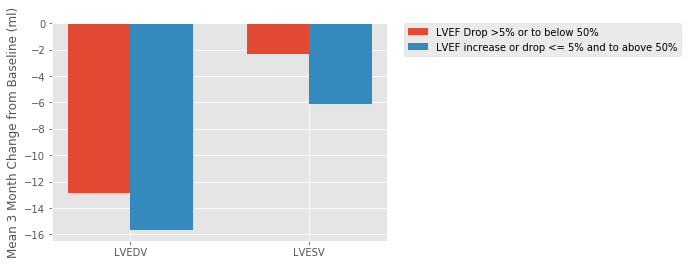

In [209]:
labels = ['LVEDV', 'LVESV']
light_purple = [LVEDV_light_purple * -1, LVESV_light_purple * -1]
dark_purple = [LVEDV_dark_purple * -1, LVESV_dark_purple * -1]
light_purple_std = [LVEDV_std_light_purple, LVESV_std_light_purple]
x = np.arange(2)  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, light_purple, width, label='LVEF Drop >5% or to below 50%')
rects2 = ax.bar(x + width/2, dark_purple, width, label='LVEF increase or drop <= 5% and to above 50%')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel("Mean 3 Month Change from Baseline (ml)")
ax.set_xticks(x)
ax.set_xticklabels(labels)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
#plt.errorbar(x, light_purple, yerr=1, linestyle="None")


plt.show()

# Figure 3

In [210]:
#[lvef drops, lvef doesn't drop]
lvesv_inc = [0, 0]
lvesv_dec = [0, 0]

for i in range(0, len(baselist) - 1):
    #chooses a pie chart
    #if lvesv increases >3mL in 3 months
    base_lvesv = baseline['vol5_lvesv'][i]
    three_lvesv = three['vol5_lvesv'][i]
    if base_lvesv + 3 < three_lvesv:
        chart_name = lvesv_inc
    else:
        chart_name = lvesv_dec
    
    #chooses a slice
    #if drop >5% or to below 50% in 24 months
    base_lvef = baseline['vol5_lvef'][i]
    tf_lvef = twentyfour1['vol5_lvef'][i]
    if base_lvef - base_lvef/20 > tf_lvef or base_lvef/2 > tf_lvef:
        chart_name[0] += 1
    else:
        chart_name[1] += 1

In [211]:
#make charts

labels = ["Drop > 5% or to below %50", "Increase or drop <= 5% and to above 50%"]
values = [lvesv_inc[0], lvesv_inc[1]]

fig = go.Figure(data=[go.Pie(labels=labels, values=values)])
fig.show()

labels = ["Drop > 5% or to below %50", "Increase or drop <= 5% and to above 50%"]
values = [lvesv_dec[0], lvesv_dec[1]]

fig = go.Figure(data=[go.Pie(labels=labels, values=values)])
fig.show()

# Figure 4

# Visualization of Missing Data

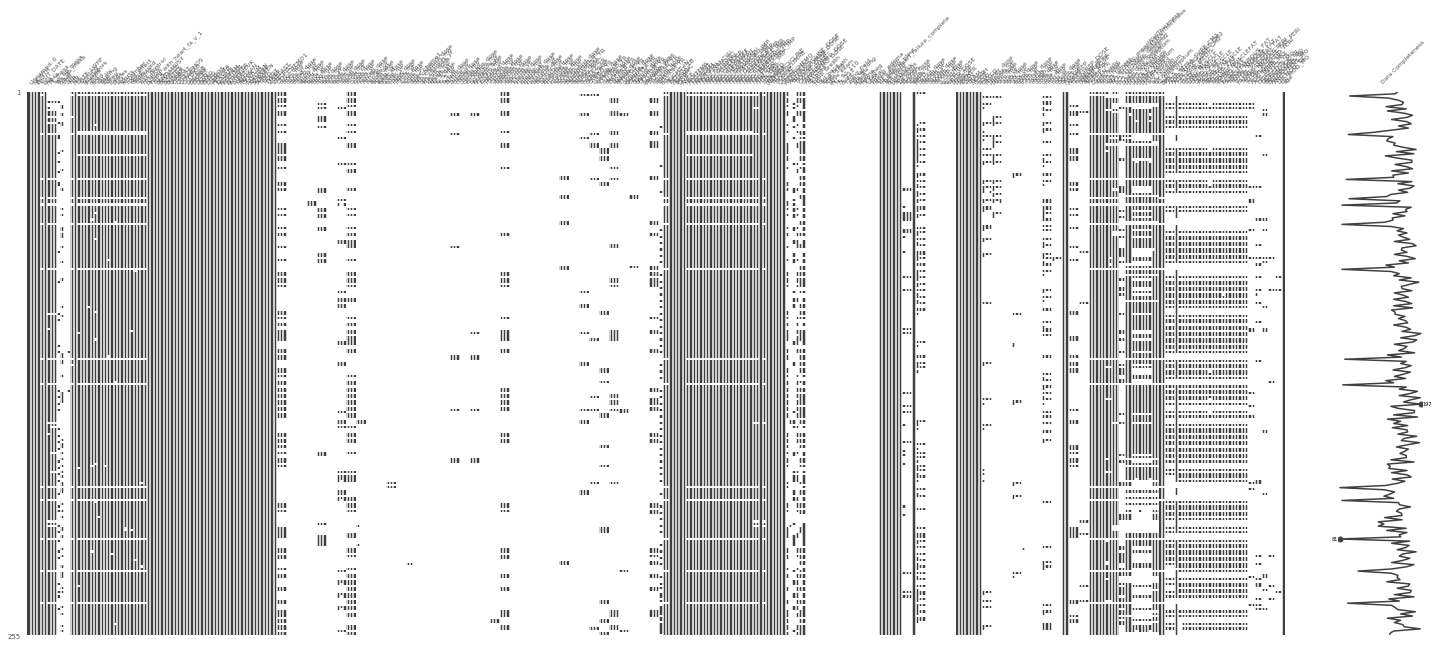

In [212]:
%matplotlib inline
msno.matrix(data, labels=True, fontsize=6)

In [213]:
# Boxplots of Table 2 Variables

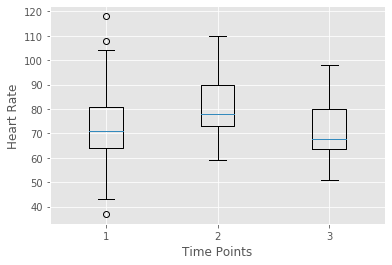

In [214]:
# Heart Rate 
plt.boxplot([baseline['hr_mesa'].dropna(), three['hr_mesa'].dropna(), twentyfour1['hr_mesa'].dropna()])
plt.ylabel('Heart Rate')
plt.xlabel('Time Points')
plt.show()

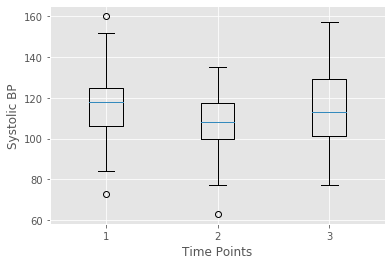

In [215]:
# Systolic BP 
plt.boxplot([baseline['sys_bp_mesa'].dropna(), three['sys_bp_mesa'].dropna(), twentyfour1['sys_bp_mesa'].dropna()])
plt.ylabel('Systolic BP')
plt.xlabel('Time Points')
plt.show()

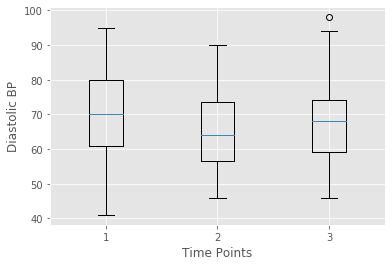

In [216]:
# Diastolic BP 
plt.boxplot([baseline['dia_bp_mesa'].dropna(), three['dia_bp_mesa'].dropna(), twentyfour1['dia_bp_mesa'].dropna()])
plt.ylabel('Diastolic BP')
plt.xlabel('Time Points')
plt.show()

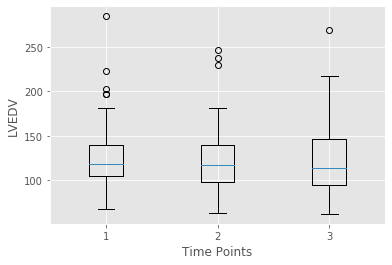

In [217]:
# LVEDV
plt.boxplot([baseline['vol5_lvedv'].dropna(), three['vol5_lvedv'].dropna(), twentyfour1['vol5_lvedv'].dropna()])
plt.ylabel('LVEDV')
plt.xlabel('Time Points')
plt.show()

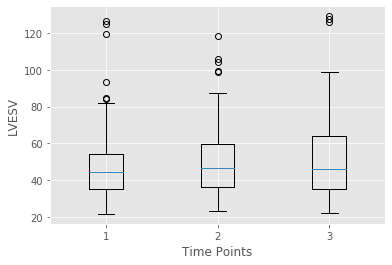

In [218]:
# LVESV
plt.boxplot([baseline['vol5_lvesv'].dropna(), three['vol5_lvesv'].dropna(), twentyfour1['vol5_lvesv'].dropna()])
plt.ylabel('LVESV')
plt.xlabel('Time Points')
plt.show()

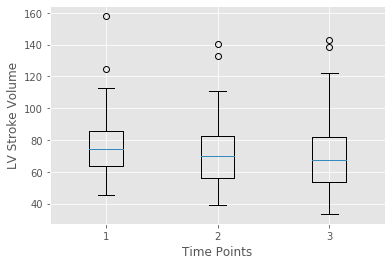

In [219]:
# LV Stroke Volume
plt.boxplot([baseline['VOL5_SV'].dropna(), three['VOL5_SV'].dropna(), twentyfour1['VOL5_SV'].dropna()])
plt.ylabel('LV Stroke Volume')
plt.xlabel('Time Points')
plt.show()

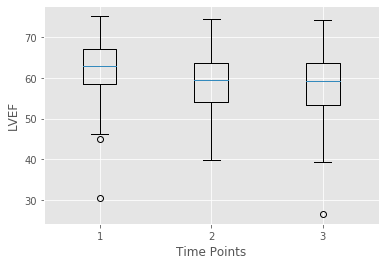

In [220]:
# LVEF
plt.boxplot([baseline['vol5_lvef'].dropna(), three['vol5_lvef'].dropna(), twentyfour1['vol5_lvef'].dropna()])
plt.ylabel('LVEF')
plt.xlabel('Time Points')
plt.show()

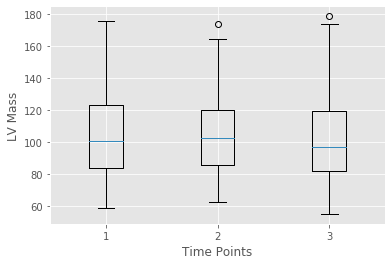

In [221]:
# LV Mass
plt.boxplot([baseline['vol5_lvmass'].dropna(), three['vol5_lvmass'].dropna(), twentyfour1['vol5_lvmass'].dropna()])
plt.ylabel('LV Mass')
plt.xlabel('Time Points')
plt.show()

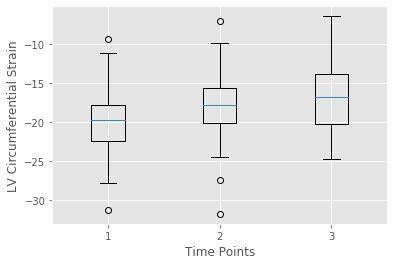

In [222]:
# LV Circumferetnial Strain 
plt.boxplot([baseline['QSTRAIN_MEDIS'].dropna(), three['QSTRAIN_MEDIS'].dropna(), twentyfour1['QSTRAIN_MEDIS'].dropna()])
plt.ylabel('LV Circumferential Strain')
plt.xlabel('Time Points')
plt.show()